Determine Gauss points $(\xi _j)$ and weights $(\omega_j)$ to integrate polynomials

In [15]:
from sympy import integrate, diff, simplify, init_printing, Symbol
init_printing()

In [3]:
import numpy as np
from numpy.polynomial.legendre import leggauss

In [39]:
def polyM(x, m):
    return sum([x**i for i in range(m+1)])

def integrate_polyM(x, m):
    return [integrate(x**i, (x,-1, 1)) for i in range(m+1)]

def monoM(x, m):
    return x**(m)

def integrate_monoM(x, m):
    return integrate(x**m, (x, -1, 1))

In [11]:
xi = Symbol("xi", real=True)

In [27]:
monoM(xi,2)

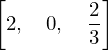

In [23]:
integrate_polyM(xi, 2) #integrate monomials upto degree m

In [43]:
def func(z, m):
    ngp = (m+1)//2 #number of gauss points required to integrate degree m poly
    wghts, pts = z[:ngp], z[ngp:]
    arr = [float(integrate_monoM(xi, k)) - wghts @ pts**(k) for k in range(m+1)]
    return arr

In [29]:
from scipy.optimize import root

In [47]:
pts, wg = leggauss(3)
zv = np.hstack((wg, pts))
func(zv, 5)
# integrate_polyM(xi, 1)

In [51]:
root(func, np.zeros(6), args=(5)).x

array([ 8.88888889e-01,  5.55555556e-01,  5.55555556e-01,  2.72132732e-12,
        7.74596669e-01, -7.74596669e-01])

In [52]:
pts

array([-0.77459667,  0.        ,  0.77459667])

In [53]:
wg

array([0.55555556, 0.88888889, 0.55555556])